In [141]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [ ]:
def convert_to_alpha_list():
    pixels = Image.open("../넘파이 연습/temp.png").resize((28,28)).tobytes("raw","A")
    return np.array([pixel / 255 for pixel in pixels]).reshape(1,784)

In [ ]:
temp = convert_to_alpha_list()
temp.shape

In [ ]:
print(convert_to_alpha_list()[:,3:10])

In [ ]:
def predict_to_number(img_arr):
    X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
    Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])
    
    W1 = tf.Variable(tf.random_normal(shape=[784, 256], stddev=0.01), name="w1val")
    L1 = tf.nn.relu(tf.matmul(X, W1))
    
    W2 = tf.Variable(tf.random_normal(shape=[256, 256], stddev=0.01), name="w2val")
    L2 = tf.nn.relu(tf.matmul(L1, W2))
    
    W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01), name="w3val")
    model = tf.matmul(L2, W3)
    
    param_list = [W1, W2, W3]
    saver = tf.train.Saver(param_list)
    
    with tf.Session() as sess:
        saver.restore(sess, "./chkp_save2/mnist")
        predict = sess.run([ model ], feed_dict = {X : img_arr})
        predict = np.array(predict)
        result = np.argmax(predict[0], axis=1)
        print("result : ", result)
        return result

In [ ]:
result = predict_to_number(convert_to_alpha_list())

In [ ]:
type(result)

In [ ]:
type(result[0])

In [ ]:
type(str(result[0]))

In [ ]:
str(result[0])

In [ ]:
1014460 / 1024

In [ ]:
os.getcwd()

In [ ]:
img = Image.open("../넘파이 연습/temp28x28.png")

In [ ]:
img

In [ ]:
b = img.tobytes("raw","A")

In [ ]:
bb =np.array([i for i in b])

In [ ]:
len(b)

In [ ]:
bb.shape

In [ ]:
b = bb.reshape(28,28)

In [ ]:
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        print(b[i,j], end='')
    print()

In [ ]:
a = tf.constant(dtype=tf.int32, value=1) #인풋노드

In [ ]:
b = tf.constant(dtype=tf.int32, value=2) #인풋노드

In [ ]:
c = a + b

In [ ]:
with tf.Session() as sess:
    c_val = sess.run(c)
    print(c_val)

In [ ]:
a = tf.placeholder(dtype=tf.int32, shape=[1,])

In [ ]:
b = tf.placeholder(dtype=tf.int32, shape=[1,])

In [ ]:
c = tf.multiply(a,b)

In [ ]:
d = tf.add(a,b)

In [ ]:
e = tf.add(c,d)

In [ ]:
with tf.Session() as sess:
    print(sess.run(e, feed_dict={a:[5], b:[3]}))

In [ ]:
k = tf.placeholder(dtype=tf.int32) #shape를 안써주면 그냥 스칼라인거 같다.

In [ ]:
with tf.Session() as sess:
    print(sess.run(k, feed_dict={k:2}))

In [ ]:
with tf.Session() as sess:
    print(sess.run(tf.add(1,2))) #인풋노드 없이 그냥 add노드만 이용한 경우

In [ ]:
a = tf.constant(value=5, dtype=tf.int32, name = "input_a")
b = tf.constant(value=3, dtype=tf.int32, name = "input_b")

In [ ]:
c = tf.multiply(a,b, name="mul_c")
d = tf.add(a,b, name="add_d")
e = tf.add(c,d, name="add_e")

In [ ]:
with tf.Session() as sess:
    print(sess.run(e))
    writer = tf.summary.FileWriter("./my_graph", sess.graph)

In [ ]:
np.array([2,3]).shape

In [2]:
g = tf.Graph() #내가 직접 그래프를 만들어서 사용해도 된다.

In [7]:
with g.as_default():
    abc = tf.add(2,3)

In [12]:
with tf.Session(graph=g) as sess:
    print(sess.run(abc))

5


In [13]:
g2 = tf.Graph()

In [14]:
with g2.as_default():
    temp = tf.add(4,4)
    with tf.Session() as sess:  #이렇게 하면 명시적으로 그래프를 지정 안해줘도 된다.
        print(sess.run(temp))

8


In [16]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [19]:
a = np.array([1,2,3])

In [21]:
aa = a > 2

In [22]:
aa.astype(np.int)

array([0, 0, 1])

In [23]:
aa.astype(np.float)

array([ 0.,  0.,  1.])

In [24]:
aa.astype(np.bool)

array([False, False,  True], dtype=bool)

In [25]:
np.array([1,0,1]).astype(np.bool)

array([ True, False,  True], dtype=bool)

In [31]:
def step_function(x):
    return np.array(object = x > 0, dtype=np.int)

In [34]:
step_function(np.array([1,2,-3]))

array([1, 1, 0])

In [35]:
x = np.arange(-5.0,5.0,0.1)

In [36]:
y = step_function(x)

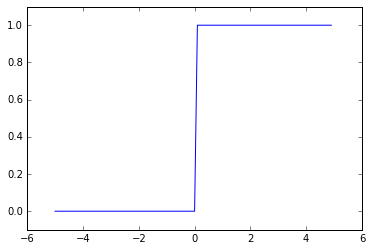

In [37]:
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [38]:
type(x)

numpy.ndarray

In [39]:
type(np.array([1,2,3]))

numpy.ndarray

In [123]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

In [41]:
sigmoid(1)

0.7310585786300049

In [42]:
sigmoid(100)

1.0

In [43]:
sigmoid(1000)

1.0

In [44]:
sigmoid(10)

0.99995460213129761

In [45]:
sigmoid(20)

0.99999999793884631

In [46]:
sigmoid(50)

1.0

In [47]:
sigmoid(30)

0.99999999999990652

In [48]:
sigmoid(40)

1.0

In [49]:
sigmoid(33)

0.99999999999999534

In [50]:
sigmoid(35)

0.99999999999999933

In [51]:
sigmoid(38)

1.0

In [52]:
sigmoid(36)

0.99999999999999978

In [53]:
sigmoid(37)

1.0

In [54]:
sigmoid(-30)

9.3576229688392989e-14

In [55]:
sigmoid(-40)

4.2483542552915889e-18

In [62]:
sigmoid(-500)

7.1245764067412845e-218

In [63]:
np.exp([1,2])

array([ 2.71828183,  7.3890561 ])

In [64]:
np.exp(np.array([1,2,3]))

array([  2.71828183,   7.3890561 ,  20.08553692])

In [68]:
np.exp(-np.array([1,2]))

array([ 0.36787944,  0.13533528])

In [69]:
-np.array([1,2])

array([-1, -2])

In [74]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
np.arange(1,10,0.1)

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9])

In [81]:
x = np.arange(-10.0,10.0,0.1)

In [82]:
y = sigmoid(x)

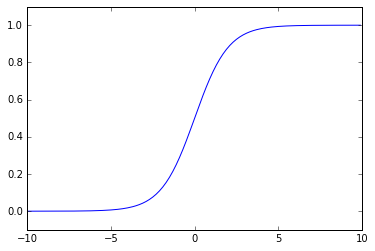

In [83]:
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [84]:
def relu(x):
    return np.maximum(0,x)

In [85]:
relu([1,2,-1])

array([1, 2, 0])

In [88]:
A = np.array([1,2,3,4]) #1차원 텐서
print(A)

[1 2 3 4]


In [89]:
np.ndim(A)

1

In [90]:
A.shape

(4,)

In [92]:
A.shape[0]

4

In [93]:
type(A.shape)

tuple

In [96]:
np.ndim(np.array(1)) #0차원 텐서

0

In [97]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [98]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [99]:
np.dot(A,B) #벡터의 내적

array([[19, 22],
       [43, 50]])

In [101]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [102]:
B = np.array([7,8])
B.shape

(2,)

In [103]:
np.dot(A,B)

array([23, 53, 83])

In [104]:
X = np.array([1,2])
X.shape

(2,)

In [110]:
W = np.array([[1,3,5],
              [2,4,6]])

In [111]:
W.shape

(2, 3)

In [112]:
Y = np.dot(X,W)

In [113]:
Y

array([ 5, 11, 17])

In [114]:
X = np.array([1.0, 0.5])

In [115]:
W1 = np.array([[0.1,0.3,0.5],
               [0.2,0.4,0.6]])

In [116]:
B1 = np.array([0.1,0.2,0.3])

In [117]:
print(W1.shape)

(2, 3)


In [118]:
print(X.shape)
print(B1.shape)

(2,)
(3,)


In [119]:
A1 = np.dot(X, W1) + B1

In [120]:
print(A1)

[ 0.3  0.7  1.1]


In [121]:
A1.shape

(3,)

In [122]:
np.ndim(A1)

1

In [124]:
Z1 = sigmoid(A1)

In [125]:
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [126]:
W2 = np.array([[0.1,0.4],
               [0.2,0.5],
               [0.3,0.6]])

In [127]:
B2 = np.array([0.1,0.2])

In [128]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [129]:
A2 = np.dot(Z1,W2) + B2

In [130]:
print(A2)

[ 0.51615984  1.21402696]


In [131]:
Z2 = sigmoid(A2)

In [132]:
print(Z2)

[ 0.62624937  0.7710107 ]


In [133]:
W3 = np.array([[0.1,0.3],
               [0.2,0.4]])

In [134]:
B3 = np.array([0.1,0.2])

In [135]:
A3 = np.dot(Z2,W3) + B3

In [139]:
Y = A3

In [137]:
print(Y)

[ 0.31682708  0.69627909]


In [140]:
a = np.array([0.3,2.9,4.0])

In [142]:
exp_a = np.exp(a)

In [143]:
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [144]:
sum_exp_a = np.sum(exp_a)

In [145]:
print(sum_exp_a)

74.1221542102


In [146]:
y = exp_a / sum_exp_a

In [147]:
y

array([ 0.01821127,  0.24519181,  0.73659691])

In [167]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) #오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [168]:
softmax(a)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [169]:
a = np.array([1010,1000,990])

In [170]:
softmax(a)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [153]:
c = np.max(a)

In [154]:
c

1010

In [156]:
a - c

array([  0, -10, -20])

In [157]:
#1씩 뺀 값으로 소프트 맥스를 구해도 결과는 같다 비율이기 때문
b = np.array([3,2,5]) 
c = np.array([2,1,4])

In [158]:
softmax(b)

array([ 0.1141952 ,  0.04201007,  0.84379473])

In [159]:
softmax(c)

array([ 0.1141952 ,  0.04201007,  0.84379473])

In [160]:
softmax(a-c)

array([ nan,  nan,  nan])

In [161]:
d = a-c

In [162]:
softmax(d)

array([ nan,  nan,  nan])

In [163]:
c = np.max(a)

In [164]:
c

1010

In [165]:
d = a-c

In [171]:
softmax(d)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [172]:
a = np.array([0.3,2.9,4.0])

In [173]:
y = softmax(a)

In [174]:
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [175]:
np.sum(y)

1.0